In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

**President Franklin D. Roosevelt in 1941**

**President John F. Kennedy in 1961**

**President Richard Nixon in 1973**

In [35]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem.snowball import SnowballStemmer
import json
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
from nltk.corpus import stopwords
from nltk import FreqDist
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [37]:
len(inaugural.fileids())

59

In [38]:
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [39]:
inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [40]:
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

2.1 Find the number of characters, words, and sentences for the mentioned documents.

**R = Characters**

In [41]:
R1= len(inaugural.raw('1941-Roosevelt.txt'))
R2= len(inaugural.raw('1961-Kennedy.txt'))
R3= len(inaugural.raw('1973-Nixon.txt'))

In [8]:
R1, R2, R3

(7571, 7618, 9991)

**Total  Characters:**

Roosevelt= 7571

Kennedy = 7618

Nixon= 9991

**W = Words**

In [9]:
W1= len(inaugural.words('1941-Roosevelt.txt'))
W2= len(inaugural.words('1961-Kennedy.txt'))
W3= len(inaugural.words('1973-Nixon.txt'))

In [10]:
W1, W2, W3

(1536, 1546, 2028)

**Total Words:**

Roosevelt= 1536

Kennedy = 1546

Nixon= 2028

**S= Sentences**

In [11]:
S1= len(inaugural.sents('1941-Roosevelt.txt'))
S2= len(inaugural.sents('1961-Kennedy.txt'))
S3= len(inaugural.sents('1973-Nixon.txt'))


In [ ]:
S1,S2,S3

(68, 52, 69)

**Total Sentences:**

Roosevelt= 68

Kennedy = 52

Nixon= 69

2.2 Remove all the stopwords from all three speeches.

In [66]:
Words1= list(inaugural.words('1941-Roosevelt.txt'))
Words2= list(inaugural.words('1961-Kennedy.txt'))
Words3= list(inaugural.words('1961-Kennedy.txt'))

In [78]:
stop = stopwords.words('english')
add_stopwords=[',','.','-',';','--','It','The', 'We','know','us']
stop.extend(add_stopwords)


In [80]:
for i in stop:
  if i in Words1:
    while i in Words1:
      Words1.remove(i)

In [81]:
nltk.FreqDist(Words1)

FreqDist({'spirit': 9, 'life': 9, 'democracy': 8, 'people': 7, 'Nation': 7, 'America': 7, 'years': 6, 'freedom': 6, 'In': 5, "'": 5, ...})

In [89]:
nltk.FreqDist(Words2)

FreqDist({'world': 8, 'pledge': 7, 'citizens': 5, 'power': 5, 'shall': 5, 'To': 5, 'free': 5, 'But': 5, 'ask': 5, 'President': 4, ...})

In [97]:
nltk.FreqDist(Words3)

FreqDist({'world': 8, 'let': 8, 'citizens': 5, 'I': 5, 'power': 5, 'shall': 5, 'To': 5, 'free': 5, 'But': 5, 'ask': 5, ...})

In [87]:
stop = stopwords.words('english')
add_stopwords=[',','.','--' ,'The', 'and','we','in','us','let','Let','sides','new','I']
stop.extend(add_stopwords)


In [88]:
for i in stop:
  if i in Words2:
    while i in Words2:
      Words2.remove(i)

In [56]:
nltk.FreqDist(Words2)

FreqDist({'us': 12, 'world': 8, 'Let': 8, 'let': 8, 'sides': 8, 'new': 7, 'pledge': 7, 'citizens': 5, 'I': 5, 'power': 5, ...})

In [106]:
stop = stopwords.words('english')
add_stopwords=[',','.','--' ,'The', ':','to','we','Let','let','sides','new','pledge','us','I']
stop.extend(add_stopwords)


In [107]:
for i in stop:
  if i in Words3:
    while i in Words3:
      Words3.remove(i)

2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords).

In [100]:
FreqDist(Words1)

FreqDist({'spirit': 9, 'life': 9, 'democracy': 8, 'people': 7, 'Nation': 7, 'America': 7, 'years': 6, 'freedom': 6, 'In': 5, "'": 5, ...})

1. Spirit

2. life

3. Democracy

In [101]:
FreqDist(Words2)

FreqDist({'world': 8, 'pledge': 7, 'citizens': 5, 'power': 5, 'shall': 5, 'To': 5, 'free': 5, 'But': 5, 'ask': 5, 'President': 4, ...})

1. world

2. pledge

3. citizens

In [108]:
FreqDist(Words3)

FreqDist({'world': 8, 'citizens': 5, 'power': 5, 'shall': 5, 'To': 5, 'free': 5, 'But': 5, 'ask': 5, 'President': 4, 'fellow': 4, ...})

1. world

2. citizens

3. power

2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords).

**President Franklin D. Roosevelt in 1941**



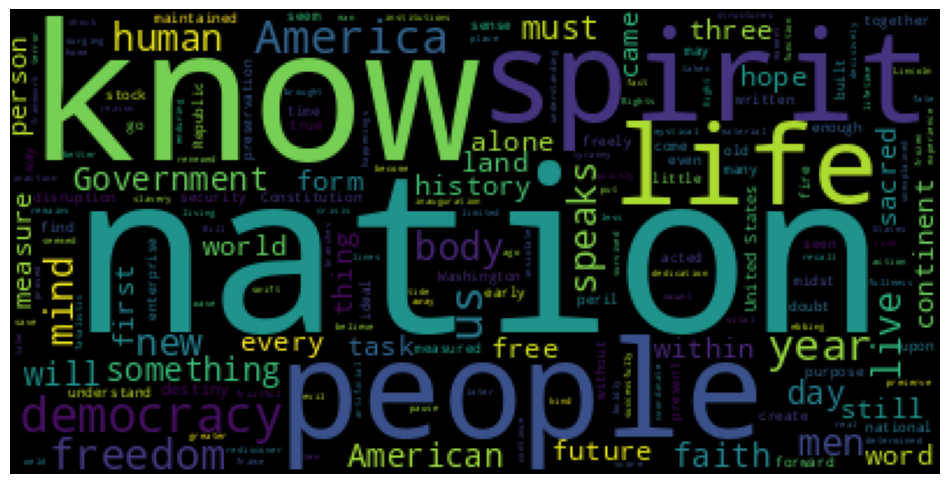

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
# Word Cloud
from wordcloud import WordCloud, STOPWORDS
new_df= inaugural.raw('1941-Roosevelt.txt')
wordcloud=WordCloud(stopwords=STOPWORDS).generate(new_df)
plt.figure(1,figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**President John F. Kennedy in 1961**


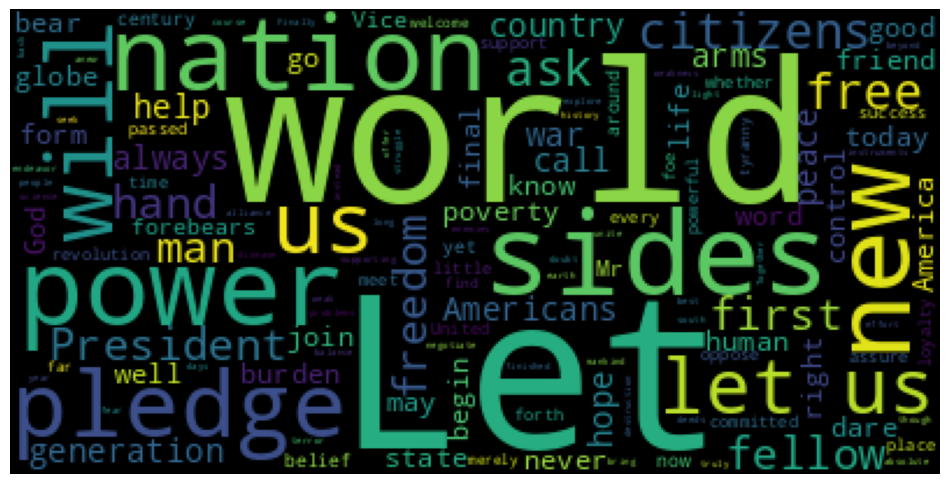

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
# Word Cloud
from wordcloud import WordCloud, STOPWORDS
new_df= inaugural.raw('1961-Kennedy.txt')
wordcloud=WordCloud(stopwords=STOPWORDS).generate(new_df)
plt.figure(1,figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


**President Richard Nixon in 1973**

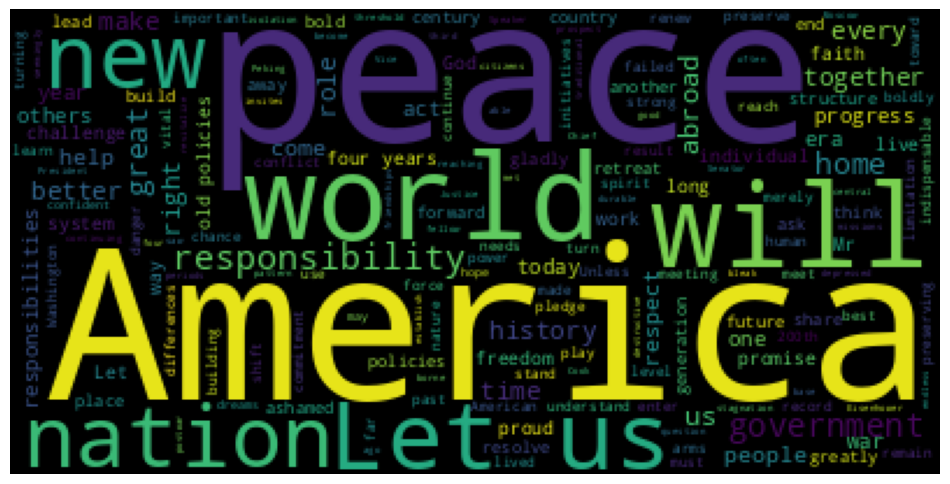

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
# Word Cloud
from wordcloud import WordCloud, STOPWORDS
new_df= inaugural.raw('1973-Nixon.txt')
wordcloud=WordCloud(stopwords=STOPWORDS).generate(new_df)
plt.figure(1,figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()